##Задание 1. Отберите 5 показателей, по которым будет проводиться кластеризация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_excel(file_path)

In [ ]:
df.head(-5)

,target,age,educ,work_exp,interest,coffee,boss_educ,passport,green,floor,children,climate,offhour,dist,salary,heigh,lunch
0,0,50,4,27,8,1.3,1,0,2,3,2,0,0,10.6,1,176,226
1,0,30,3,10,0,0.0,6,1,2,3,0,0,0,11.5,0,186,226
2,0,43,3,22,7,1.9,6,1,1,5,0,3,0,12.8,1,166,238
3,0,58,3,31,7,2.0,4,0,3,3,1,1,0,15.2,1,180,216
4,1,40,3,23,7,0.0,6,1,3,2,0,0,0,16.1,1,180,286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,1,50,3,23,5,0.0,6,1,1,3,1,2,0,12.4,1,177,309
975,0,42,4,17,9,0.0,5,0,1,1,4,2,1,11.6,1,167,260
976,1,62,5,35,9,0.0,5,0,4,4,0,0,1,12.1,0,168,197
977,0,52,4,27,8,0.0,3,1,4,25,2,0,1,12.3,0,180,441


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
target,984.0,0.320122,0.466760,0.0,0.0,0.0,1.0,1.0
age,984.0,41.108740,12.394227,17.0,32.0,40.5,50.0,80.0
educ,984.0,2.741870,1.287089,0.0,2.0,3.0,4.0,6.0
work_exp,984.0,19.360772,12.485227,0.0,9.0,18.0,28.0,61.0
interest,984.0,5.137195,2.973344,0.0,3.0,5.0,8.0,10.0
coffee,984.0,0.909654,0.976238,0.0,0.0,0.5,1.8,3.6
boss_educ,984.0,3.819106,1.501373,0.0,3.0,4.0,5.0,7.0
passport,984.0,0.377033,0.484890,0.0,0.0,0.0,1.0,1.0
green,984.0,2.455285,1.305763,1.0,1.0,2.0,3.0,5.0
floor,984.0,4.945122,4.468385,1.0,2.0,4.0,6.0,29.0


In [ ]:
!pip install python-docx

In [ ]:
import docx

desc = docx.Document(doc_path)
print(*[par.text for par in desc.paragraphs], sep = '\n')

target – сотрудник уволится в следующем году (0-нет, 1-да)
age - возраст
educ - образование (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)
work_exp – стаж работы (лет)
interest – оценка сотрудником интереса к работе (от 0 до 10)
coffee - среднее количество чашек кофе, выпиваемых сотрудником за рабочий день
boss_educ - образование руководителя (1-начальное, 2-среднее, 3 -неоконченное высшее, 4-два и более высших образования, 5-кандидат наук, 6-доктор наук)
passport - наличие загранпаспорта у сотрудника (1-есть, 0 -нет)
green - степень озеленения офиса (от 1 до 5)
floor – этаж работы
children – количество детей у сотрудника
climate - удовлетворенность рабочей атмосферой (от 0 до 4)
offhour – наличие переработок (1-да, 0 -нет)
dist – расстояние до работы
salary – удовлетворенность заработной платой (1-да, 0 -нет)
height - рост сотрудника
lunch - средняя цена бизнес-ланча в офисе


In [ ]:
df.corr().abs()['target'].sort_values(ascending=False)

target       1.000000
coffee       0.316441
climate      0.267805
interest     0.266240
offhour      0.266213
dist         0.245826
passport     0.185342
salary       0.099234
children     0.061014
educ         0.046247
boss_educ    0.042071
green        0.040751
heigh        0.038524
age          0.030904
work_exp     0.024676
floor        0.011566
lunch        0.009652
Name: target, dtype: float64

Отобранные показатели:  
`climate`, `interest`, `offhour`, `salary`, `children`

**Обоснование сделанного выбора**  
Показатели первоначально отбираются по корреляции, чтобы гарантировать наличие связи. Потом показатели отбираются по смыслу - если не просматривается логики в том, как переменная может повлиять на таргет, то эта переменная отсеивается.

Обоснование включения или отсеивания переменных:
* `coffee` обьясняет физиологические особенности работника, но не его шанс уволиться
* `climate` показывает, насколько условия работы его удовлетворяют, что является хорошим предиктором его ухода
* `interest` показывает, насколько условия работы соответствуют его интересам, что является хорошим предиктором его ухода
* `offhour` - людям не нравятся переработки - перерабатывающий сотрудник с большим шансом будет искать другую работу
* `dist` - люди в крайне редкий случаях готовы менять работу из-за ее близости. Чаще сотрудник переезжает поближе к работе
* `passport` - нет никакой связи наличия загранпаспорта с шансом ухода с работы  
* `salary` - человек, недовольный зарплатой, будет искать другую работу
* `children` - человеку с детьми важна финансовая стабильность, поэтому он менее предрасположен с смене работы, даже если его не устраивают условия

Проведение нормальной стандартизации данных

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
scaler_standard.fit(df)
data_standard = scaler_standard.transform(df)

In [ ]:
df_std = pd.DataFrame(data_standard, columns = df.columns)
df_std.describe().T

,count,mean,std,min,25%,50%,75%,max
target,984.0,5.776770e-17,1.000509,-0.686187,-0.686187,-0.686187,1.457330,1.457330
age,984.0,-6.498866e-17,1.000509,-1.946148,-0.735292,-0.049140,0.717736,3.139449
educ,984.0,1.245616e-16,1.000509,-2.131372,-0.576687,0.200655,0.977998,2.532683
work_exp,984.0,1.047040e-16,1.000509,-1.551483,-0.830264,-0.109046,0.692308,3.336776
interest,984.0,1.245616e-16,1.000509,-1.728629,-0.719151,-0.046165,0.963313,1.636299
coffee,984.0,-2.707861e-17,1.000509,-0.932270,-0.932270,-0.419839,0.912481,2.757232
boss_educ,984.0,-1.155354e-16,1.000509,-2.545036,-0.545849,0.120547,0.786943,2.119734
passport,984.0,1.299773e-16,1.000509,-0.777959,-0.777959,-0.777959,1.285415,1.285415
green,984.0,1.949660e-16,1.000509,-1.115075,-1.115075,-0.348850,0.417375,1.949825
floor,984.0,-4.693626e-17,1.000509,-0.883346,-0.659437,-0.211621,0.236196,5.386087


In [ ]:
df_std = df_std[['climate', 'interest', 'offhour', 'salary', 'children']]

Проведение min-max стандартизации данных

In [ ]:
df_minmax = df.copy(deep=True)

for column in df.columns:
  df_minmax[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

df_minmax.describe().T

,count,mean,std,min,25%,50%,75%,max
target,984.0,0.320122,0.466760,0.0,0.000000,0.000000,1.000000,1.0
age,984.0,0.382678,0.196734,0.0,0.238095,0.373016,0.523810,1.0
educ,984.0,0.456978,0.214515,0.0,0.333333,0.500000,0.666667,1.0
work_exp,984.0,0.317390,0.204676,0.0,0.147541,0.295082,0.459016,1.0
interest,984.0,0.513720,0.297334,0.0,0.300000,0.500000,0.800000,1.0
coffee,984.0,0.252682,0.271177,0.0,0.000000,0.138889,0.500000,1.0
boss_educ,984.0,0.545587,0.214482,0.0,0.428571,0.571429,0.714286,1.0
passport,984.0,0.377033,0.484890,0.0,0.000000,0.000000,1.000000,1.0
green,984.0,0.363821,0.326441,0.0,0.000000,0.250000,0.500000,1.0
floor,984.0,0.140897,0.159585,0.0,0.035714,0.107143,0.178571,1.0


In [ ]:
df_minmax = df_minmax[['climate', 'interest', 'offhour', 'salary', 'children']]

##Задание 2. Выбор оптимального числа кластеров

###Задание 2.1 Выберете оптимальное число кластеров методом KElbow

Выбор числа кластеров будет проводится на данных со стандартной нормировкой

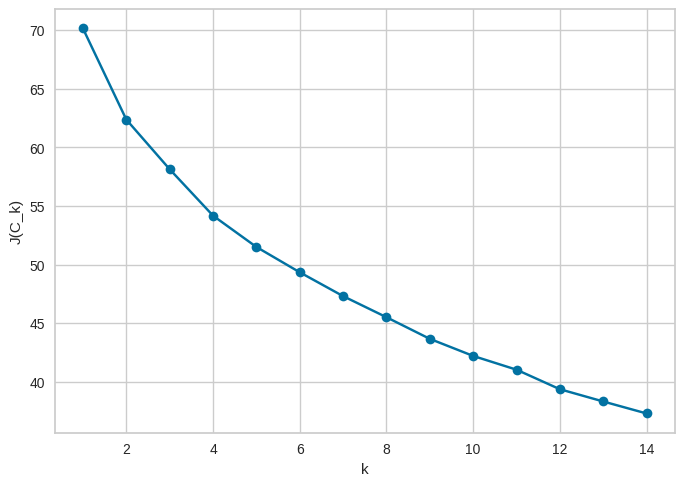

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k, random_state = 88801).fit(df_std)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 15), inertia, marker='o');
plt.xlabel('k')
plt.ylabel('J(C_k)');

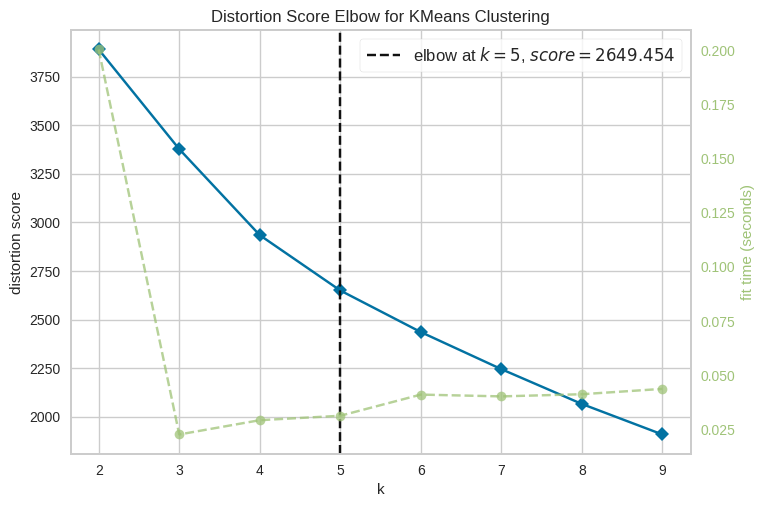

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state = 88802)
visualizer = KElbowVisualizer(model, k = (2,10))

visualizer.fit(df_std)
visualizer.show()
plt.show()

Предположение насчет оптимального числа кластеров:  
В графике нет явных переломов, поэтому воспользуемся 'knee point'. Так, оптимальное количество кластеров - 5

###Задание 2.2 Выберете оптимальное число кластеров с помощью иерархических дендрограмм

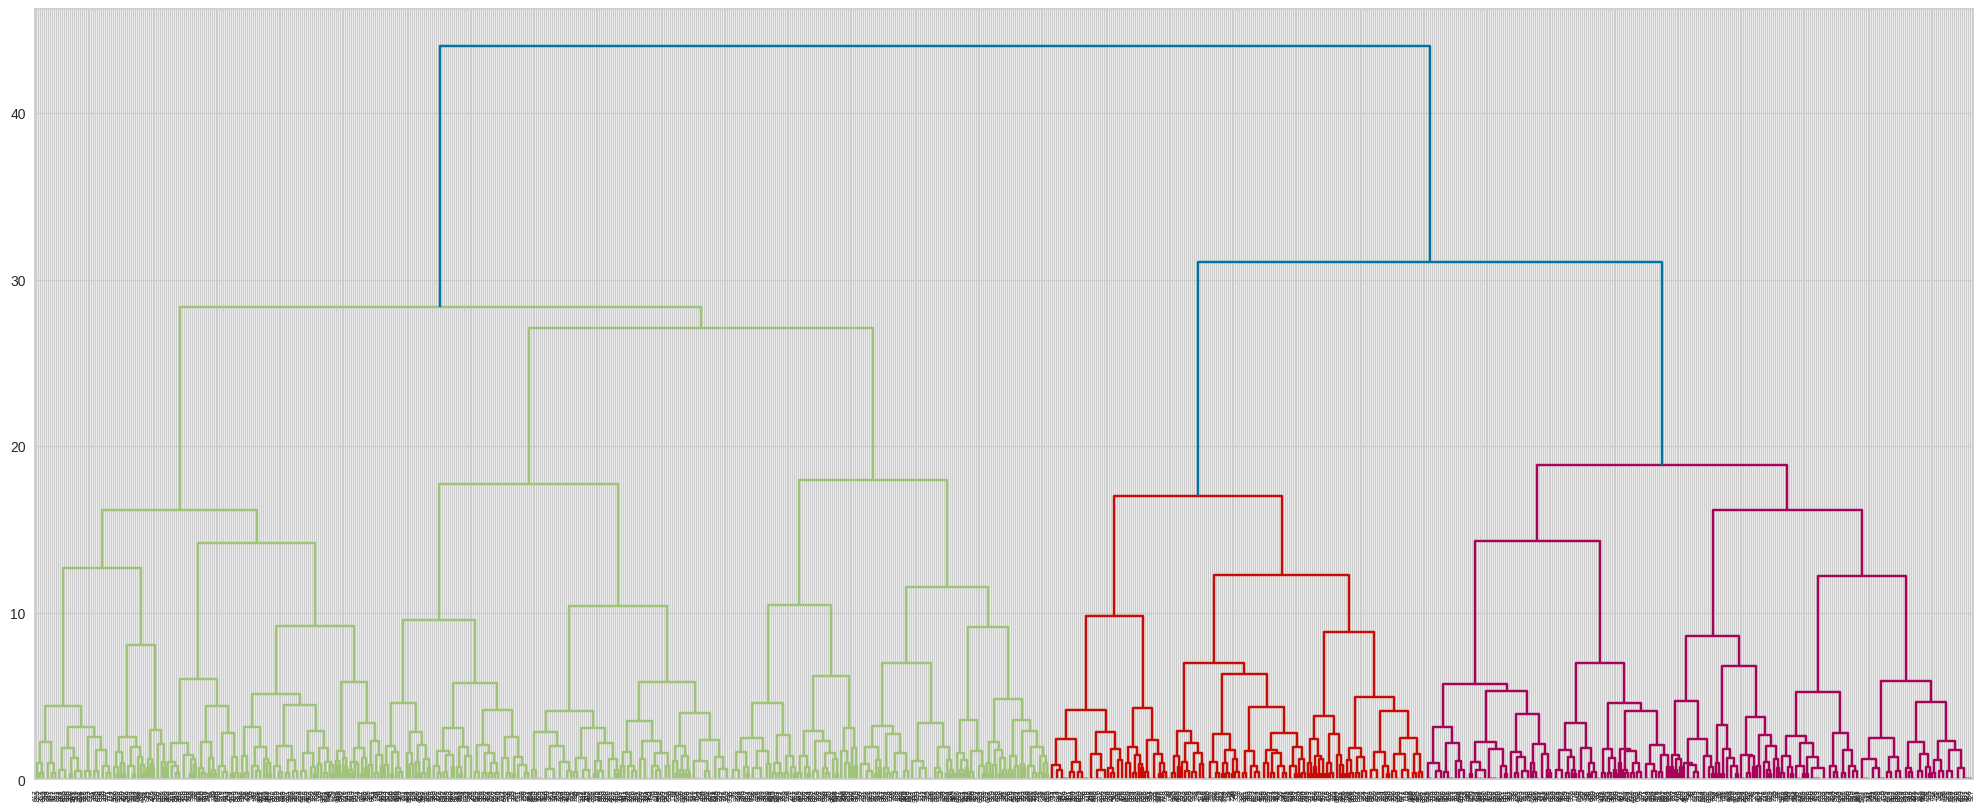

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_std, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Предположение насчет оптимального числа кластеров:  
Обьединение в 5 или 2 кластера кажется оптимальным. Так как 2 кластера - крайне мало для кластеризации сотрудников предприятия, мы проводим линию на уровне 20 и получаем 5 кластеров.

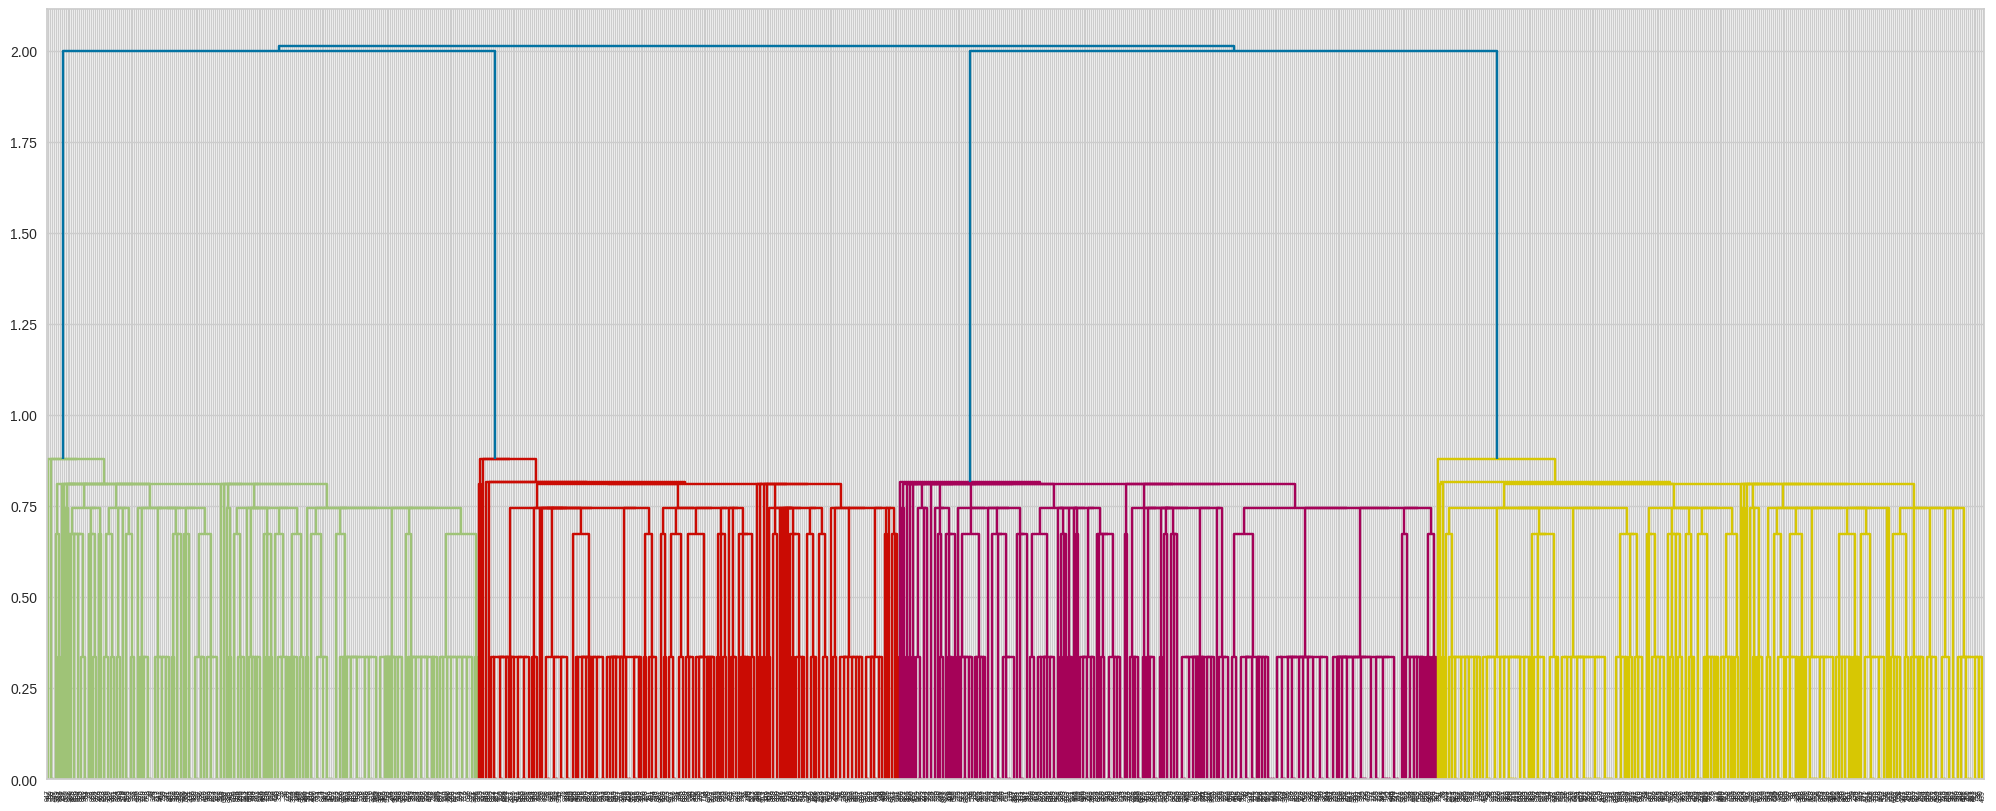

In [ ]:
Z = linkage(df_std, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Предположение насчет оптимального числа кластеров:  
Оптимальное число кластеров - 4

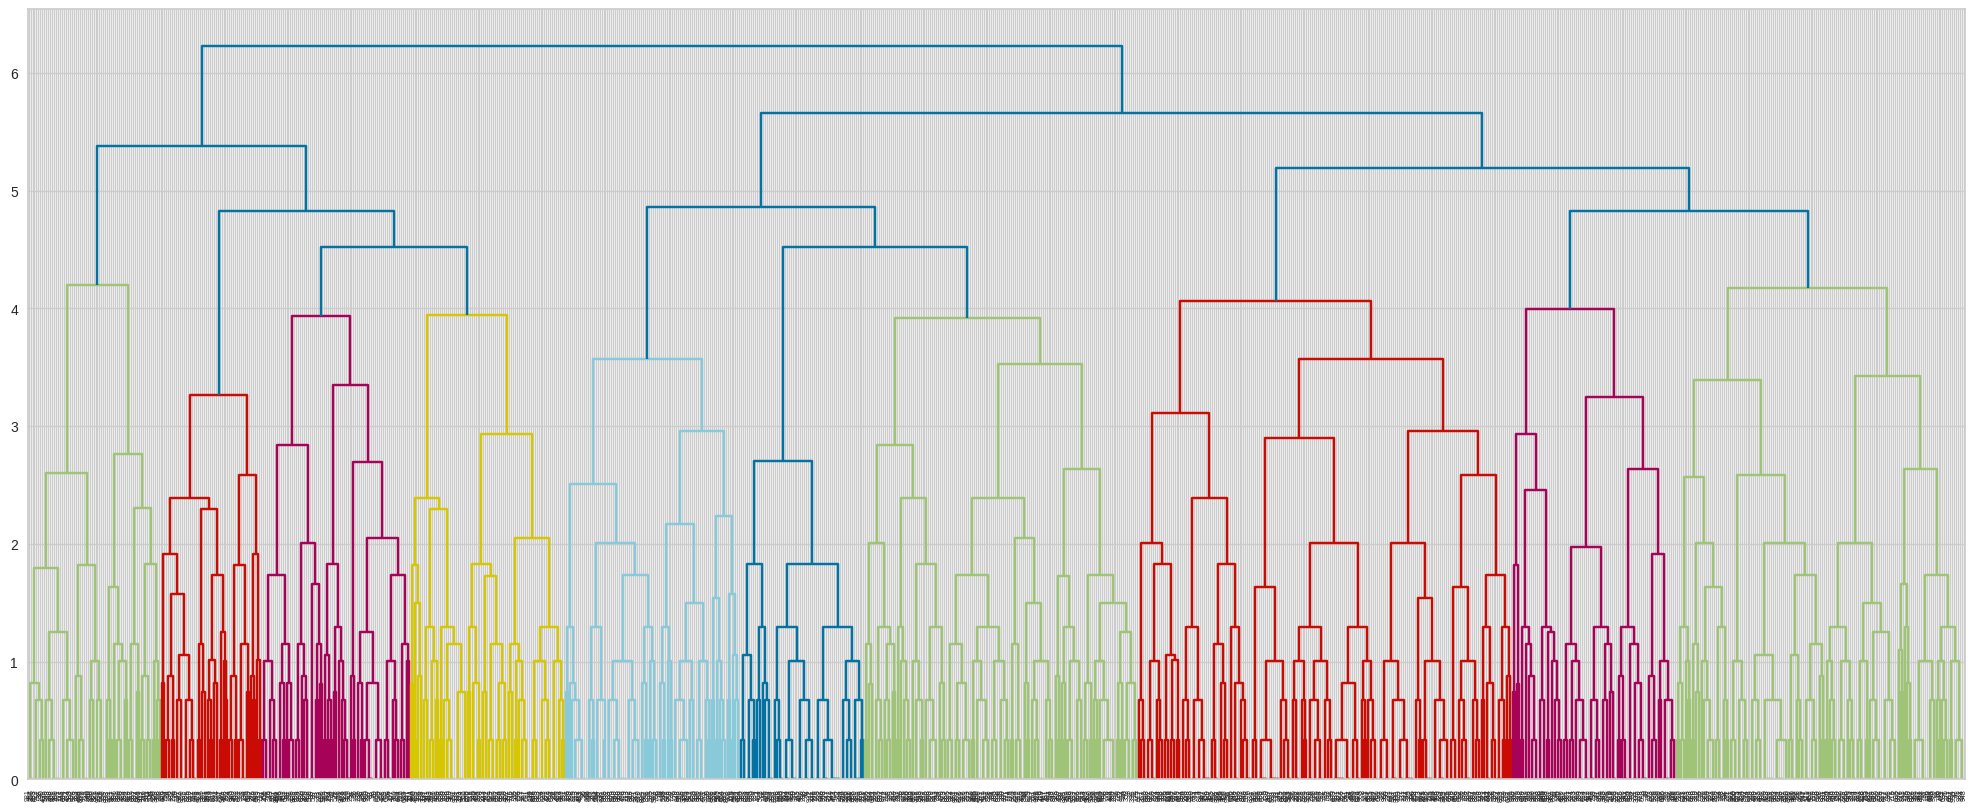

In [ ]:
Z = linkage(df_std, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

Предположение насчет оптимального числа кластеров:  
Судя по графику, оптимальное число кластеров - 2 или 5. Проведем горизонтальную линию на уровне 5, что дает нам 5 оптимальных кластеров

**Выберем лучшую иерархическую кластеризацию**

Лучшей иерархической кластеризацией признана та, которая использует расстояние Варда.

Две другие кластеризации используют метрику расстояния, которое учитывает только минимальное или максимальное расстояние между переменными как расстояние между точками, что является слишком сильным упрощением связи между данными.

###Задание 2.3 Выберете оптимальное число кластеров с помощью силуета

Среднее значение силуэта для 2 кластеров: 0.22


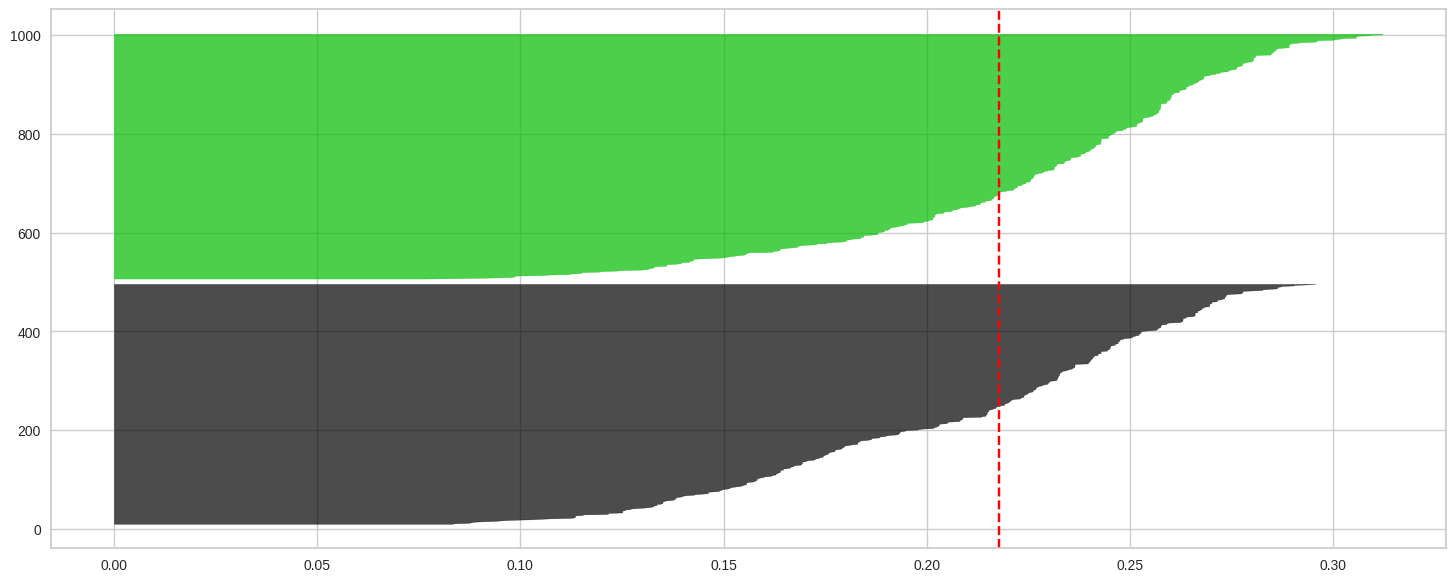

In [ ]:
from matplotlib import cm
from sklearn.metrics import silhouette_score, silhouette_samples

fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=2, random_state = 88803)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 2 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 2):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 2)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 3 кластеров: 0.21


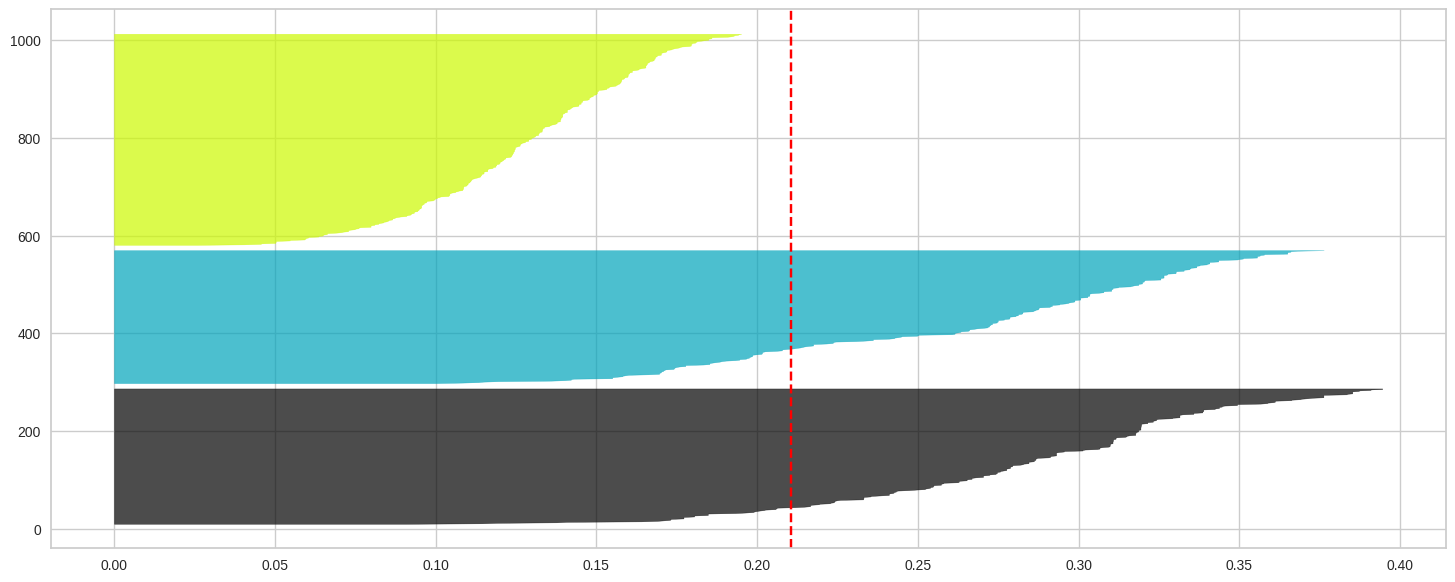

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=3, random_state=88804)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 3 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 3):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 4 кластеров: 0.26


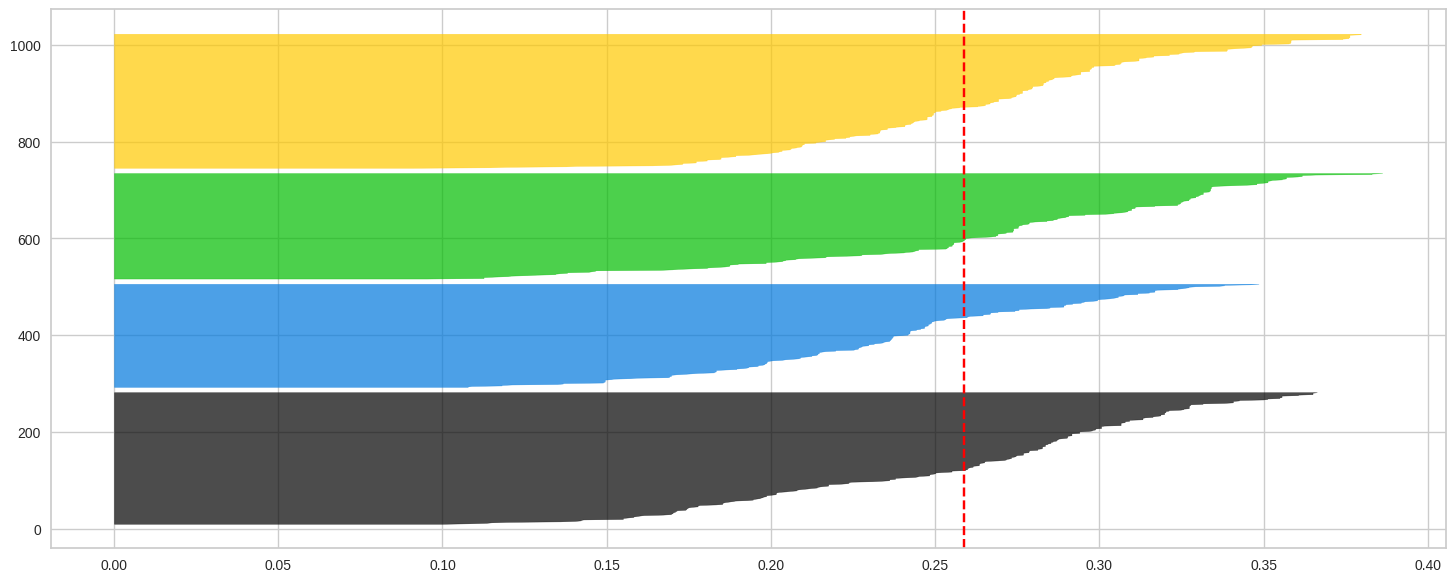

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=4, random_state=88805)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 4 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 4):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 5 кластеров: 0.24


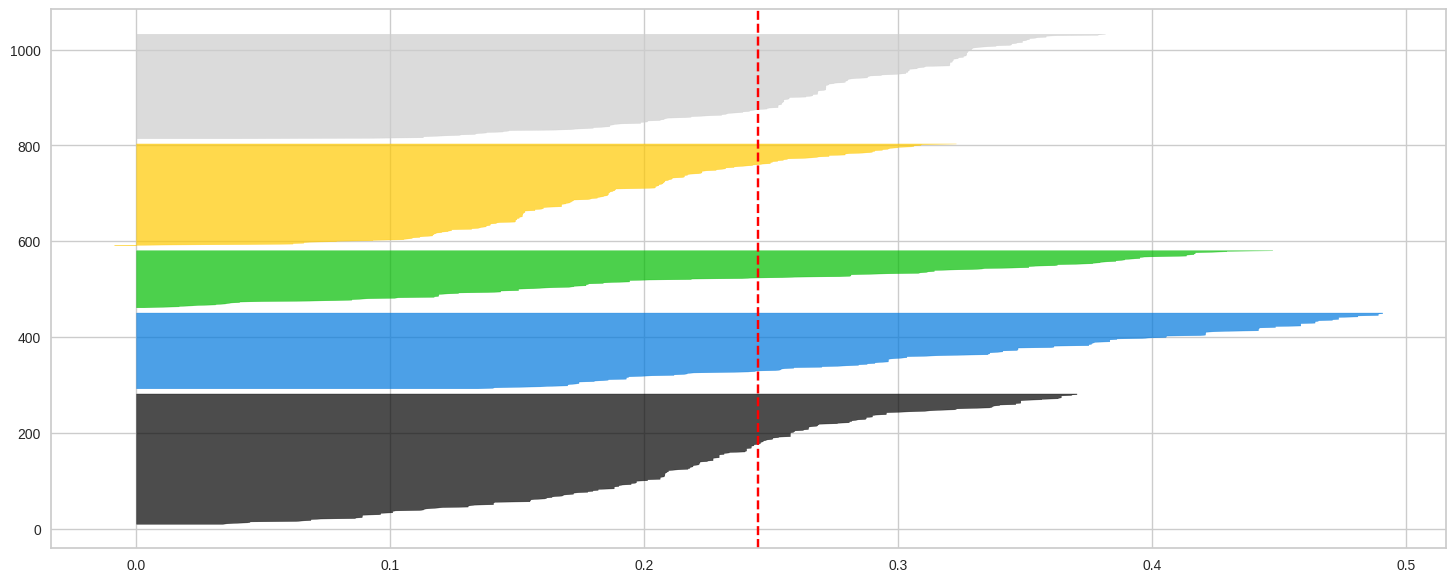

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=5, random_state=88806)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 5 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 5):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 6 кластеров: 0.24


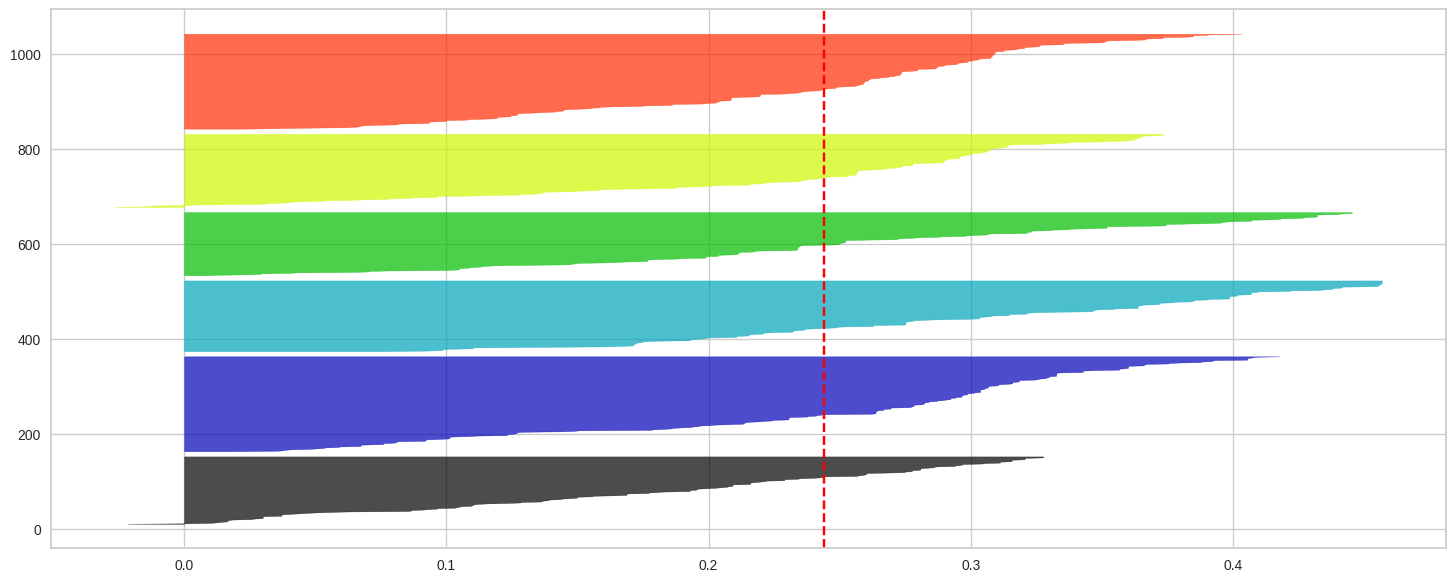

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=6, random_state=88807)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 6 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 6):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 6)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 7 кластеров: 0.25


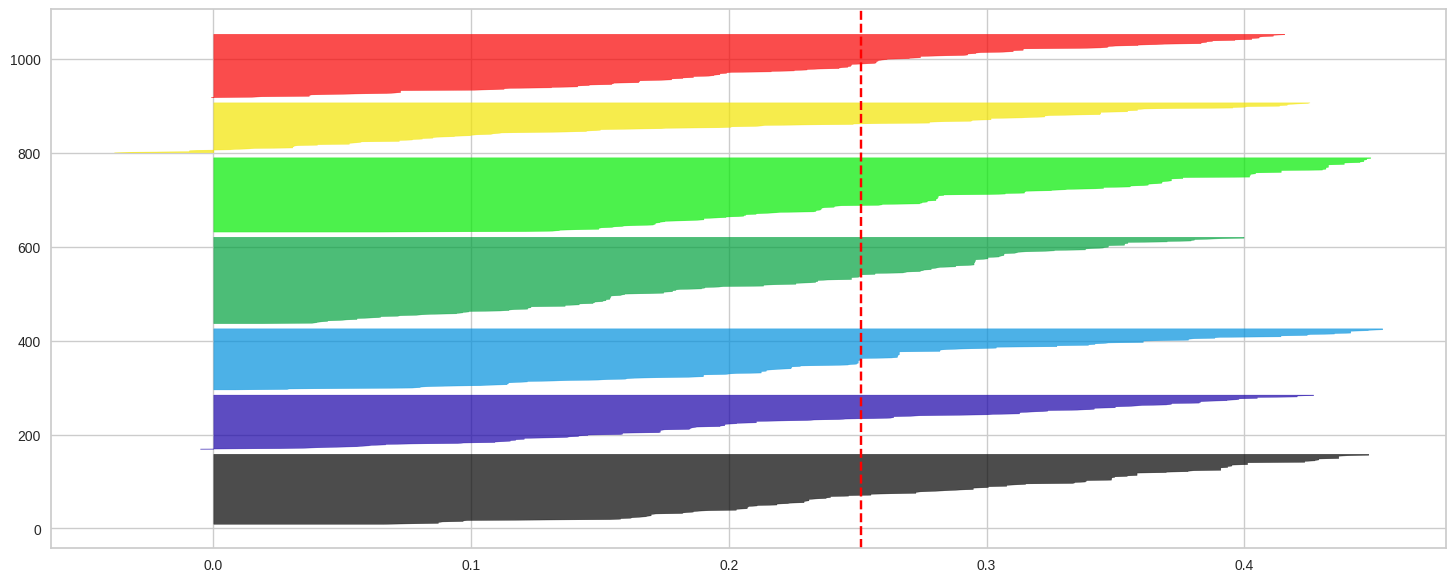

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=7, random_state=88808)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 7 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 7):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 7)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 8 кластеров: 0.25


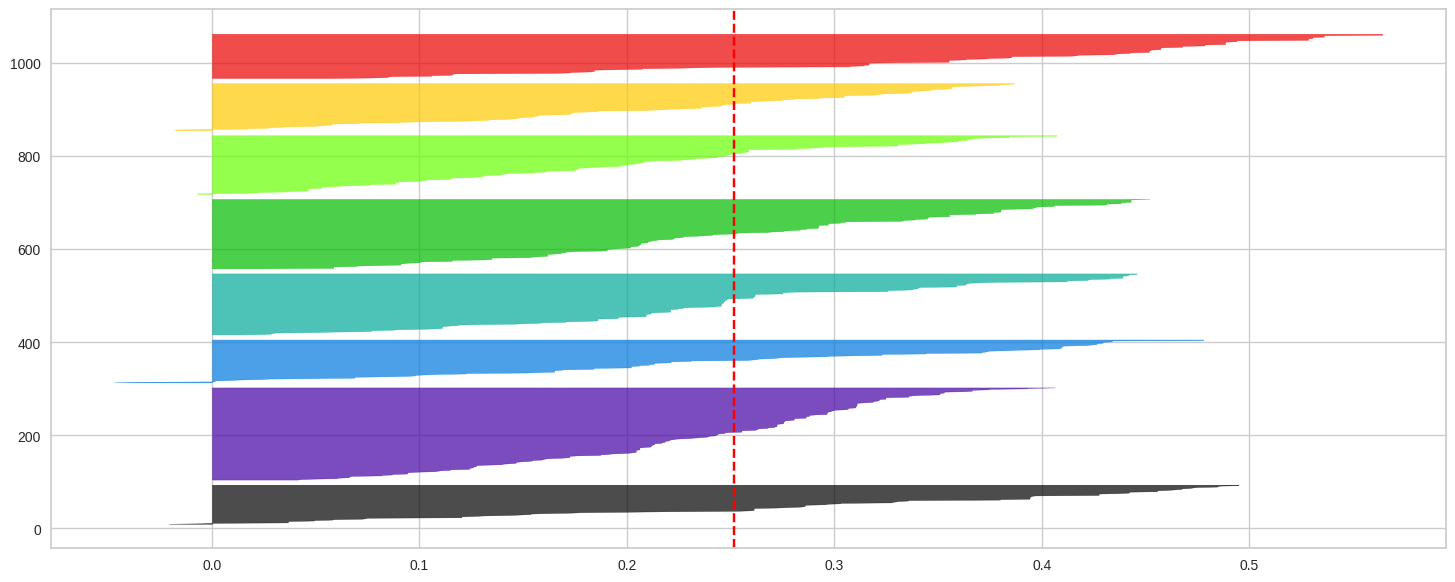

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=8, random_state=88809)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 8 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 8):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 8)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 9 кластеров: 0.26


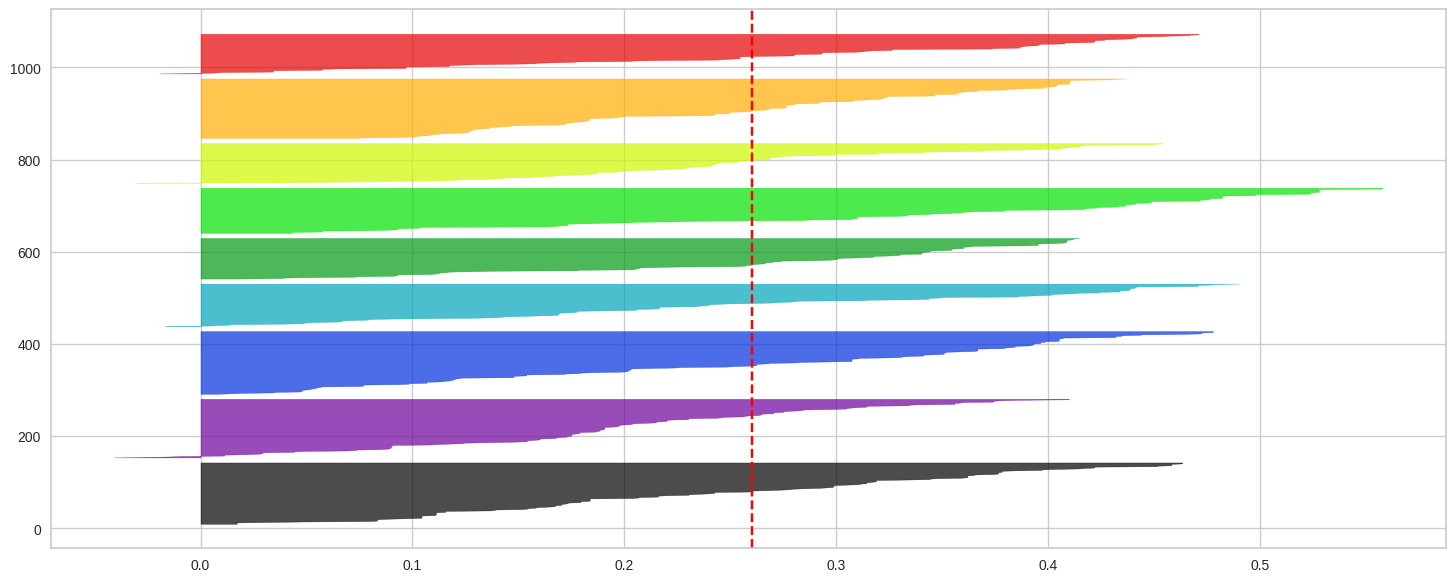

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=9, random_state=88810)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 9 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 9):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 9)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

Среднее значение силуэта для 10 кластеров: 0.26


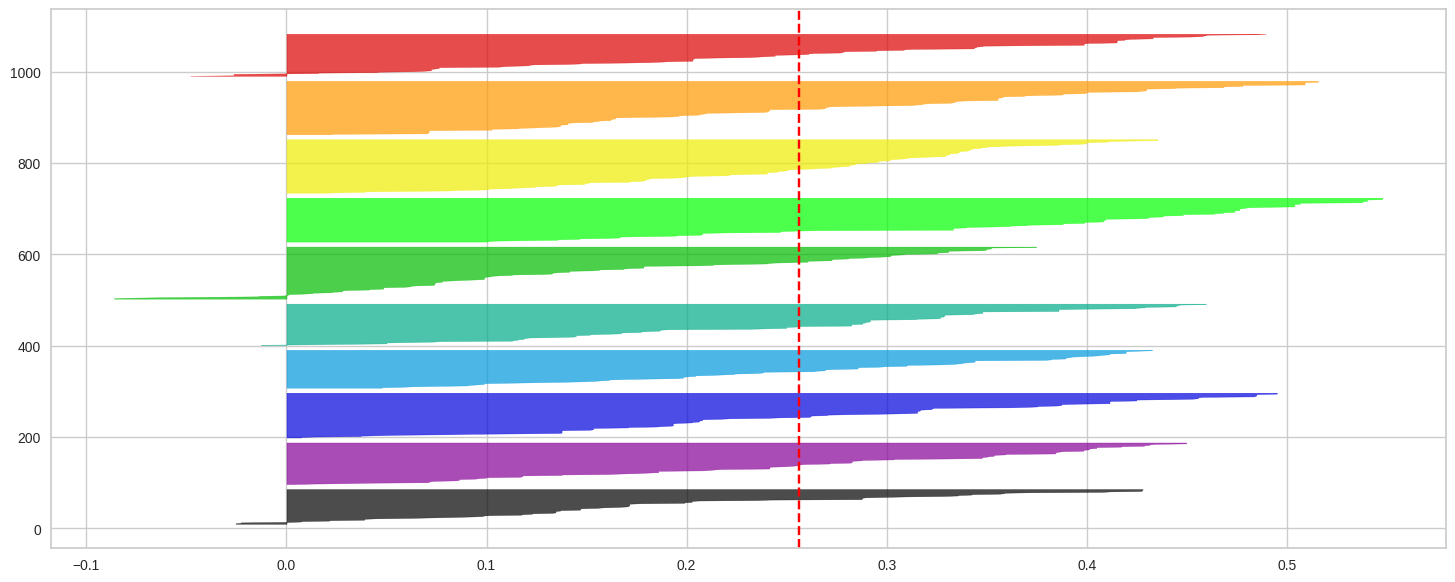

In [ ]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(18, 7)


clusterer = KMeans(n_clusters=10, random_state=88811)
cluster_labels = clusterer.fit_predict(df_std)

silhouette_avg = silhouette_score(df_std, cluster_labels)
print("Среднее значение силуэта для 10 кластеров:", round(silhouette_avg,2))

sample_silhouette_values = silhouette_samples(df_std, cluster_labels)

y_lower = 10
for i in range(0, 10):
    ith_cluster_silhouette_values = \
         sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 10)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    y_lower = y_upper + 10

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.show()

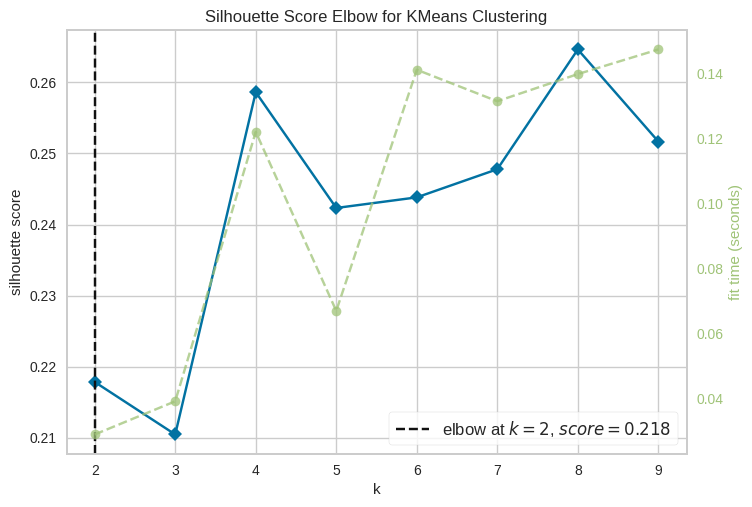

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=88812)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(df_std)
visualizer.show()

**Интерпретация графиков коэффициентов силуэта**  
Судя по графику, оптимальное число кластеров - 8.\
\
**Окончательный выбор оптимального числа кластеров**  
Итак, иерархическая кластеризация показала, что разделение на 5 кластеров оптимально, а графики коэффициентов силуэта - 8. Мы отдаем предпочтение методу иерархической кластеризации, так как он чаще используется в исследованиях в экономической, социальной и других областях. Так, мы решаем, что оптиальное количество кластеров - 5.

##Задание 3. Проведите кластеризацию KMeans со стандартной и min-max нормировкой


### Задание 3.1. Проведите кластеризацию на данных с стандартной нормировкой

In [ ]:
KM_fitted = KMeans(n_clusters=5, init='k-means++', random_state=88813).fit(df_std)
KM_fitted

KMeans(n_clusters=5, random_state=88813)

In [ ]:
#датафрейм с индексами кластеров
df_std_KM = df_std.copy()
df_std_KM['Cluster'] = KM_fitted.labels_
df_std_KM.head(-5)

,climate,interest,offhour,salary,children,Cluster
0,-1.347444,0.963313,-0.989889,1.128059,0.592036,1
1,-1.347444,-1.728629,-0.989889,-0.886478,-1.032966,3
2,0.885939,0.626820,-0.989889,1.128059,-1.032966,1
3,-0.602983,0.626820,-0.989889,1.128059,-0.220465,1
4,-1.347444,0.626820,-0.989889,1.128059,-1.032966,1
...,...,...,...,...,...,...
974,0.141478,-0.046165,-0.989889,1.128059,-0.220465,1
975,0.141478,1.299806,1.010215,1.128059,2.217038,4
976,-1.347444,1.299806,1.010215,-0.886478,-1.032966,0
977,-1.347444,0.963313,1.010215,-0.886478,0.592036,0


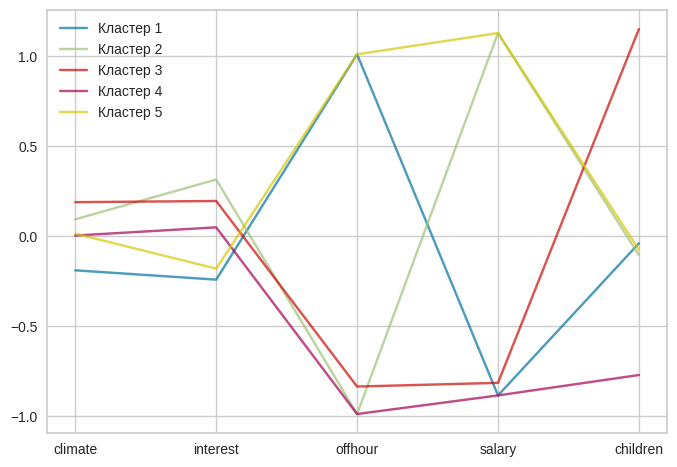

In [ ]:
out = pd.DataFrame(KM_fitted.cluster_centers_, columns=df_std.columns, index=['Кластер ' + str(i + 1) for i in range(5)])

fig, ax = plt.subplots()

for i in range(out.shape[0]):
  ax.plot(out.iloc[i], label=out.iloc[i].name, alpha=0.7)

plt.legend()
plt.show()

**Интерпретация графика средних**  
* Люди с большим количеством детей часто недовольны зарплатой (кластер 3)
* Сотрудники, высоко оценивающие климат и свой интерес к работе, редко перерабатывают (кластеры 2 и 3). И наоборот, сотрудники, низко оценивающие климат и свой интерес к работе, часто перерабатывают перерабатывают
* Нет явной закономерности между переработками и удовлетворением зарплатой, из чего мы можем сделать вывод, что сотрудники перерабатывают не для дополнительной оплаты (при условии что переработки оплачиваются)


### Задание 3.2. Проведите кластеризацию на данных с min-max нормировкой

In [ ]:
KM_fitted_minmax = KMeans(n_clusters=5, init='k-means++', random_state=88814).fit(df_minmax)
KM_fitted_minmax

KMeans(n_clusters=5, random_state=88814)

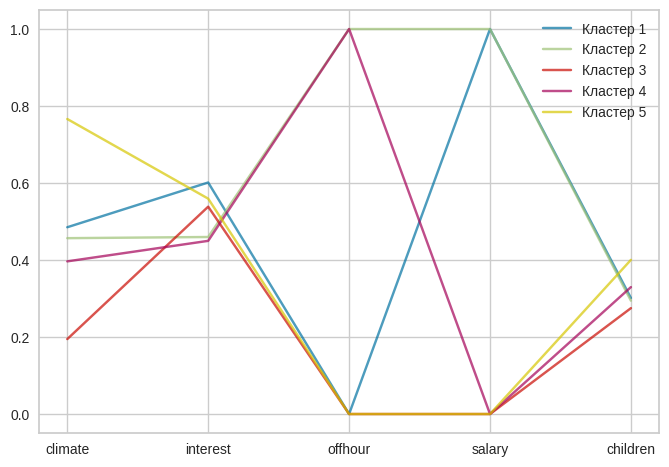

In [ ]:
out = pd.DataFrame(KM_fitted_minmax.cluster_centers_, columns=df_minmax.columns, index=['Кластер ' + str(i + 1) for i in range(5)])

fig, ax = plt.subplots()

for i in range(out.shape[0]):
  ax.plot(out.iloc[i], label=out.iloc[i].name, alpha=0.7)

plt.legend()
plt.show()

**Интерпретация графика средних**  
* Как и на предыдущем графике, сотрудники с высокой оценкой климата и своего интереса к работе редко перерабатывают
* Сотрудники с низкими оценками климата часто недовольны зарплатой
* Сотрудники с низкой оценкой своего интереса к работе часто перерабатывают

**Выбор и обоснование предпочтительной нормировки**  
В нормировке min-max средние кластеров по переменным interest и children располагаются очень близко. Это произошло из-за того,
что в данных присутствуют экстремальные значения, которые сместили данные при нормировке. Так, по этим переменным нельзя сделать какой-либо вывод.
Принимая это во внимание, я делаю вывод, что стандартная нормализация (standard scaler) является оптимальной.

### Задание 3.3. Предложите меры по повышению эффективности работы сотрудников для каждого кластера (для предпочтительной нормировки)  
Предпочтительная нормировка - стандартная. Выведем график средних еще раз

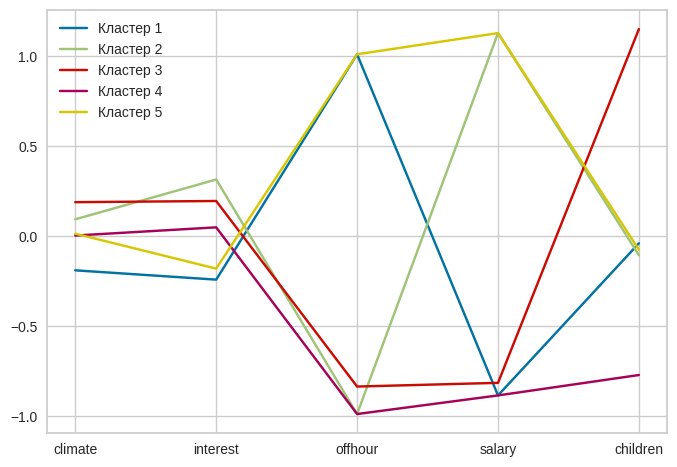

In [ ]:
out = pd.DataFrame(KM_fitted.cluster_centers_, columns=df_std.columns, index=['Кластер ' + str(i + 1) for i in range(5)])

fig, ax = plt.subplots()

for i in range(out.shape[0]):
  ax.plot(out.iloc[i], label=out.iloc[i].name)

plt.legend()
plt.show()

Меры для кластеров:
* 1: снизить нагрузку, чтобы не было надобности перерабатывать
* 2: все отлично, никаких мер поддержки не нужно
* 3: ввести день, когда сотрудники могут привести своих детей на работу. Заставить детей работать (с какой-нибудь компенсацией).
* 4: можно предложить им взять на себя дополнительные задачи (других кластеров) за дополнительную плату, однако тогда оценки климата и интереса явно упадут
* 5: так же, как и для кластера 1, снизить нагрузку

##Задание 4. Проведите кластеризацию DBSCAN (для предпочтительной нормировки)

In [ ]:
from sklearn.cluster import DBSCAN

Здесь нужно было подобрать такие значения `eps` и `min_samples`, чтобы число кластеров было равно числу выбранных кластеров в кластеризации KMeans. Это необходимо для сравнения с кластеризацией методом KMeans

In [ ]:
dbscan = DBSCAN(eps=0.9, min_samples=15).fit(df_std)

labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

In [ ]:
dbscan.core_sample_indices_

array([  0,   2,   3,   4,   5,   6,   8,  11,  12,  15,  18,  19,  20,
        21,  22,  25,  30,  31,  32,  33,  34,  37,  38,  40,  42,  45,
        46,  47,  49,  51,  52,  53,  57,  58,  60,  62,  63,  64,  65,
        66,  67,  68,  72,  74,  75,  76,  77,  78,  80,  84,  85,  86,
        87,  88,  90,  91,  92,  93,  94,  95,  97,  99, 100, 101, 103,
       104, 105, 107, 108, 110, 111, 113, 114, 117, 118, 119, 120, 121,
       122, 123, 125, 129, 131, 132, 133, 134, 137, 138, 141, 142, 145,
       147, 148, 149, 150, 155, 156, 158, 160, 162, 163, 164, 165, 166,
       168, 169, 170, 171, 173, 175, 176, 177, 178, 179, 180, 182, 183,
       184, 185, 186, 187, 188, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 206, 207, 208, 209, 210, 211, 213, 214, 215, 216, 217,
       219, 221, 224, 225, 227, 228, 229, 230, 232, 233, 237, 238, 239,
       240, 242, 243, 244, 245, 246, 248, 250, 252, 253, 254, 255, 257,
       259, 260, 261, 262, 264, 265, 266, 267, 268, 270, 271, 27

Что означают цифры в предыдущей ячейке?  
Это индексы ключевых наблюдений. Алгоритм решил, что у наблюдения достаточно "соседей" для того, чтобы сделать их центром кластера.

In [ ]:
# размер кластеров
unique, counts = np.unique(dbscan.labels_, return_counts=True)
unique, counts

(array([-1,  0,  1,  2,  3,  4]), array([121, 185, 258, 240, 174,   6]))

In [ ]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  1,  0,  3,  1,  0,  3,  2,  1,  2,  2,  2,  0,
        3,  0,  1,  2,  0,  0, -1,  2,  3,  1,  2,  2,  0,  0,  1,  2,  1,
        3, -1,  3,  0,  1,  1,  0,  1,  2, -1,  3,  1,  0,  3,  3,  1,  1,
        2,  2,  1,  1, -1,  3,  1,  1,  0,  1,  3,  0,  1,  3,  3,  3,  2,
        1,  3,  2,  1,  3, -1,  2,  3,  2,  2,  0, -1,  2,  3,  1,  3,  2,
        1,  2,  1,  1, -1,  2,  0,  0,  1,  2,  1,  1,  0, -1,  1,  2,  1,
       -1,  0,  0,  1, -1,  1,  1,  0,  2,  1,  0,  1,  0, -1,  3,  1,  0,
        1,  2,  3,  0,  2, -1,  2,  3,  0, -1,  0,  3,  2,  0,  1,  3, -1,
        2,  2,  0, -1,  3,  1,  1,  2, -1,  1, -1,  3,  1,  2,  0,  3,  2,
        3,  1,  1,  1,  1,  2, -1,  3,  2,  0,  2,  0,  2,  0,  2,  1,  3,
        1,  1,  0,  2, -1,  1,  2,  2,  1,  2,  2,  2,  3,  1,  0,  1,  2,
        2,  2,  0,  1,  1, -1, -1,  2,  1,  3,  1,  2,  1,  3,  1,  2,  1,
        1,  3,  2,  1,  1,  2,  3,  2,  2,  1,  3,  2,  3,  0,  0,  3,  2,
        3, -1,  2,  2,  1

Что означает класс -1 в предыдущей ячейке?  
Это наблюдения, которые считаются слишком шумными, и которым не был назначен класс.

In [ ]:
df_dbscan = df_std.copy(deep=True)
df_dbscan['cluster'] = dbscan.labels_

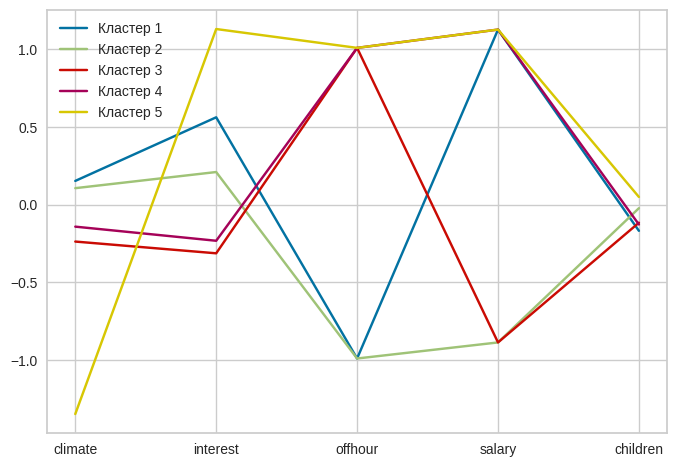

In [ ]:
out = df_dbscan.groupby('cluster').mean().iloc[1:,:]

fig, ax = plt.subplots()

for i in range(out.shape[0]):
  ax.plot(out.iloc[i], label='Кластер ' + str(1 + out.iloc[i].name))

plt.legend()
plt.show()

###Задание 4.1. Дайте экономическую интерпретацию графику средних и предложите меры поддержки для каждого кластера.


**Интерпретация графика средних**  
* Как и на двух предыдущих графиках, люди с высокими оценками климата и интереса к работе редко перерабатывают, и наоборот
* Оценки климата и интереса к работе сильно коррелированы. Это неверно только для кластера 5, но там слишком мало человек, чтобы делать какие-то однозначные выводы. В этом кластере, судя по всему, просто собрали выбросы по вышеуказанным переменным
* Как и на предыдущих графиках, переработки и довольство зарплатой не влияют друг на друга

\
**Меры поддержки кластеров**
* 1: у них все отлично, меры поддержки не нужны. Можно им предложить взять на себя часть обязанностей (с компенсацией) других кластеров, с которых нужно будет снять нагрузку
* 2: им тоже можно предложить взять на себя часть обязанностей других кластеров за дополнительную компенсацию
* 3: снять часть нагрузки
* 4: так же, как и кластеру 3, снять часть нагрузки
* 5: можно предположить, что это кластер людей, которым испытывают очень большой энтузиазм по отношению к своей работе, и из-за этого энтузиазма они могут быть слишком напористыми или аггрессивными, из-за чего они часто попадают в ссоры с коллегами. В таком случае достаточно поговорить начальнику с сотрудником, объяснить, что цените его вклад и энтузиазм в работе, и рабочие процессы могут идти быстрее, если относится к менее энергичным коллегам с терпением.

##Задание 5. Сравните графики средних KMeans и DBSCAN и выберите наиболее удачный метод кластеризации.

**Сравнение**  
KMeans выделил более-менее равные по размерам классы, что является хорошим результатом. DBSCAN выделил экстремальный кластер с размером 6, а также обозначил некоторые наблюдения как слишком шумные, и не присвоил им класс.\
\
**Выбор**  
Исходя из наших задач можно предположить, что у каждого сотрудника должен быть свой кластер, чтобы мы знали, как его можно мотивировать, или насколько часто проблемы конкретного сотрудника встречаются у других людей в компании.  
Также, большой размер кластеров является более предпочтительным, чтобы по каждому кластеру можно было сделать какие-то существенные выводы о состоянии сотрудников в компании. Исходя из этого, я выбираю KMeans в качестве предпочтительного метода кластеризации.